In [5]:
#imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics as mt
import math

In [50]:
#database
X_test = pd.read_csv('database/Classificacao/X_test.csv')
X_train = pd.read_csv('database/Classificacao/X_training.csv')
X_val = pd.read_csv('database/Classificacao/X_validation.csv')
y_test = pd.read_csv('database/Classificacao/y_test.csv')
y_train = pd.read_csv('database/Classificacao/y_training.csv')
y_val = pd.read_csv('database/Classificacao/y_validation.csv')

In [24]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [35]:
#knn

#n = len(X_train)
#k_initial = int(math.sqrt(n))
#acuraria_k = dict()

#for i in range(1, 30, 3):
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)
#acuraria_k[i] = acuracia_teste 


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
#acuraria_k

{1: 0.678368671069401,
 4: 0.662263932336925,
 7: 0.6677480400108138,
 10: 0.6625728961495385,
 13: 0.6573591318116866,
 16: 0.6514501988954544,
 19: 0.6456957478855289,
 22: 0.6429923145251613,
 25: 0.6382033754296528,
 28: 0.6344571892017148}

In [43]:
#metrics 
#accuracy train
at = mt.accuracy_score(y_train, pred_train)
#accuracy val
av = mt.accuracy_score(y_val, pred_val)
#accuracy test
ate = mt.accuracy_score(y_test, pred_test)

print(at, av, ate)

0.7563124870716403 0.6669777019852634 0.6677480400108138


In [44]:
#precision train
pt = mt.precision_score(y_train, pred_train)
#precision val
pv = mt.precision_score(y_val, pred_val)
#precision test
pte = mt.precision_score(y_test, pred_test)

print(pt, pv, pte)

0.731248949403261 0.6227083169407507 0.6302830188679245


In [45]:
#recall train
rt = mt.recall_score(y_train, pred_train)
#recall val
rv = mt.recall_score(y_val, pred_val)
#recall test
rte = mt.recall_score(y_test, pred_test)

print(rt, rv, rte)

0.6920898561792033 0.5875714603905264 0.5878574571051474


In [46]:
#f1 train
ft = mt.f1_score(y_train, pred_train)
#f1 val
fv = mt.f1_score(y_val, pred_val)
#f1 test
fte = mt.f1_score(y_test, pred_test)

print(ft, fv, fte)

0.7111307276085855 0.6046298418519367 0.6083314363760528


# Decision Tree

In [47]:
from sklearn import tree as tr

In [54]:
model_tree = tr.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
pred_train = model_tree.predict(X_train)
pred_val = model_tree.predict(X_val)
pred_test = model_tree.predict(X_test)

In [55]:
#accuracy train
at = mt.accuracy_score(y_train, pred_train)
#accuracy val
ac = mt.accuracy_score(y_val, pred_val)
#accuracy test
tc = mt.accuracy_score(y_test, pred_test)

at, ac, tc


(1.0, 0.9445928118665337, 0.9443865137295794)

# Random Forest

In [24]:
from sklearn import ensemble as en
import matplotlib.pyplot as plt

In [25]:
model = en.RandomForestClassifier(n_estimators=4, random_state=0, n_jobs=-1)

#fit
model.fit(X_train, y_train)

#performance

pred_test = model.predict_proba(X_test)

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
pred_test = pred_test[:, 1]
pred_test

array([1.  , 1.  , 0.  , ..., 0.  , 0.75, 0.  ])

Text(0, 0.5, 'tpr')

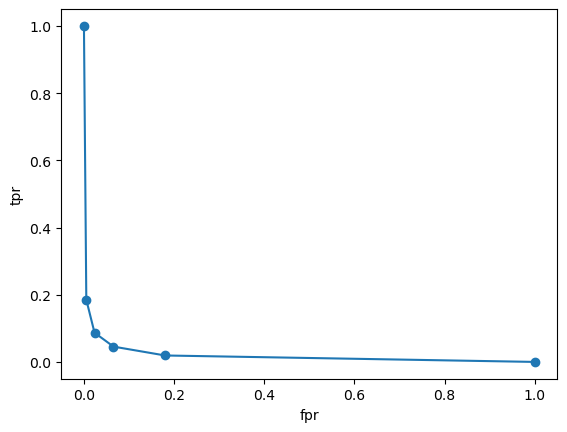

In [27]:
# ROC Curve
fpr, tpr, th = mt.roc_curve(y_test, pred_test)

plt.plot(fpr, 1-tpr, marker='o')

plt.xlabel('fpr')
plt.ylabel('tpr')

In [28]:
distance = np.sqrt(1-tpr**2 + fpr **2)
distance

array([1.        , 0.57954335, 0.40848577, 0.30555629, 0.26531956,
       1.        ])

In [29]:
best_th = th[np.argmin(distance)]
print('Best threshold = {} '.format(best_th))

Best threshold = 0.25 


In [30]:
pred_test = (pred_test >= best_th).astype(int)
acc = mt.accuracy_score(pred_test, y_test)
print('Accuracy: {} '.format(acc))

Accuracy: 0.8905881898582628 


In [34]:
feature_names = [f'Feature {i}' for i in range(X_test.shape[1])]
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances

Feature 0     0.026766
Feature 1     0.031603
Feature 2     0.030440
Feature 3     0.029341
Feature 4     0.038740
Feature 5     0.126265
Feature 6     0.009487
Feature 7     0.034801
Feature 8     0.012647
Feature 9     0.007264
Feature 10    0.221752
Feature 11    0.060768
Feature 12    0.030554
Feature 13    0.076393
Feature 14    0.041907
Feature 15    0.015098
Feature 16    0.020348
Feature 17    0.017274
Feature 18    0.019256
Feature 19    0.010398
Feature 20    0.011632
Feature 21    0.002956
Feature 22    0.004788
Feature 23    0.045209
Feature 24    0.074315
dtype: float64

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [63]:
X_test = pd.read_csv('database/Regressao/X_test.csv')
X_train = pd.read_csv('database/Regressao/X_training.csv')
X_val = pd.read_csv('database/Regressao/X_validation.csv')
y_test = pd.read_csv('database/Regressao/y_test.csv')
y_train = pd.read_csv('database/Regressao/y_training.csv')
y_val = pd.read_csv('database/Regressao/y_val.csv')

In [66]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = lr_model.predict(X_train)
y_pred

array([[51.09989007],
       [52.58539717],
       [53.18206633],
       ...,
       [42.51230742],
       [49.28363461],
       [53.28139895]])

In [68]:
mt.r2_score(y_train, y_pred)

0.04605830473391903

In [69]:
mse = np.round(mt.mean_squared_error(y_train, y_pred), 2)
print(mse)

456.0


In [70]:
rmse = np.round(mt.root_mean_squared_error(y_train, y_pred), 2)
print(rmse)

21.35


# Affinity propagation

In [86]:
from sklearn.cluster import AffinityPropagation
import time
from IPython import display

In [92]:
X = pd.read_csv('database/Clusterizacao/X_dataset.csv')

In [93]:
#model
model = AffinityPropagation()

#training
model.fit(X)

#fit - clustering
labels = model.predict(X)

#labels
labels

array([ 3,  0,  2,  3,  2,  3,  1,  2,  1,  1,  3,  1,  1,  1,  3,  2,  2,
        2,  3,  2,  3,  2,  1,  2,  2,  9,  2,  0,  2,  1,  2,  3,  1,  2,
        2,  2,  2,  2,  0,  3,  3,  0,  1,  0,  1,  2,  1,  1,  3,  3,  1,
        1,  3,  2,  3,  3,  3,  2,  3,  4, 11, 11,  0,  8, 12,  2,  1,  6,
       12,  5,  7,  2, 10, 15,  8,  6,  0,  7,  5,  7,  6,  8,  7,  7,  8,
        0,  7,  7,  7,  7,  7,  7,  7,  8,  8,  5,  2,  6,  8,  8,  6,  6,
        7,  6,  6,  7,  6,  7,  6,  8,  5,  6, 12,  7,  7,  7,  6,  7,  6,
        6,  8,  9,  7,  8,  8,  6,  7,  7,  7,  7, 10, 10, 10, 10, 11, 11,
       12, 12, 11, 12, 12, 10, 12, 12, 14,  0, 13, 13, 13, 14, 15, 14, 15,
       13, 11, 13, 13, 12, 16, 16, 13, 12, 12, 10, 13, 13, 14, 13, 15, 15,
       10, 13, 13, 13, 13, 14, 14, 13], dtype=int64)

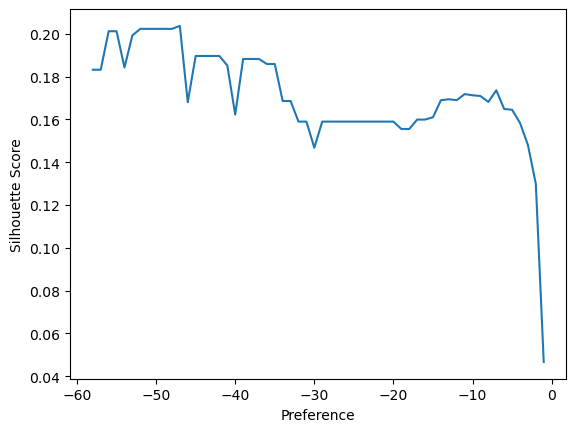

<Figure size 640x480 with 0 Axes>

In [104]:
p=np.arange(-1, -60, -1)
ss_list = list()

for i in range(len(p)):
    #print('Preference value: {}'.format(p[i]))
    model = AffinityPropagation(preference=p[i])
    #training
    model.fit(X)
    #fit - clustering
    labels = model.predict(X)

    #performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)

    #plot
    plt.plot(p[:i], ss_list[:i])
    plt.xlabel('Preference')
    plt.ylabel('Silhouette Score')
    display.clear_output(wait=True)
    plt.show()
    plt.gcf()
    time.sleep(0.5)

In [105]:
max_index = ss_list.index(max(ss_list))


p_best = p[max_index]
p_best

-47

In [106]:
af = AffinityPropagation(preference=p_best)
af.fit(X)
labels = af.predict(X)

In [107]:
print('Número de Clusters: {} '.format(len(np.unique(labels))))

Número de Clusters: 7 
